In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ipywidgets import interact
import ipywidgets as widgets

In [52]:
# import data
data = np.load('../../../data/raw_data/nike_calcium_trace.npy')
X_all = data.T
with open('../../../data/raw_data/behaviour.pickle','rb') as f:
    behaviour = pickle.load(f)

stimulus_duration = 60 # in indexes
stimuli = [1,2,3,4,5,6]


In [53]:
def extract_stim_traces(traces=None,bh_data=None,stimuli=None,onset=None,offset=None):
    aligned_traces = []
    for stim in stimuli:
        stim_aligned_traces = []
        for stim_onset in bh_data[f'sound{stim}']:
            stim_aligned_traces.append(traces[:,stim_onset+onset:stim_onset+offset])
        aligned_traces.append(np.asarray(stim_aligned_traces))

    return aligned_traces

    

<AxesSubplot:ylabel='Count'>

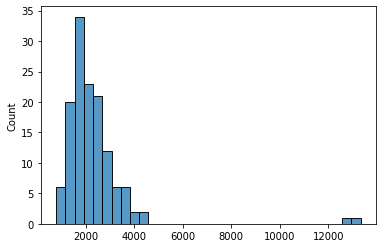

In [54]:
shift_traces = np.asarray([t-min(t) for t in data])
tot_activity = np.sum(data,axis=1)/data.shape[1]
sns.histplot(tot_activity)

In [55]:
#clean data
traces = data[tot_activity<10000]


In [56]:
traces = zscore(traces,axis=-1)
aligned_traces = extract_stim_traces(traces=traces,
                                     bh_data=behaviour,
                                     stimuli=stimuli,
                                     onset=-15,
                                     offset=75)

n_cells = len(traces)

In [57]:
def plot_unit(stim,neuron):
    stim_traces = aligned_traces[stim]
    x = np.linspace(-0.5,2.5,stim_traces.shape[-1])
    plt.figure(figsize=(10,10))
    plt.axvline(x=0,linestyle='--')
    plt.axvline(x=2,linestyle='--')
    for i in range(stim_traces.shape[0]):
        plt.plot(x,stim_traces[i,neuron]+i*0.5,c='k')
    sns.despine
    
interact(plot_unit, stim=widgets.IntSlider(min=0, max=(len(stimuli)-1)),
                    neuron = widgets.IntSlider(min=0, max=(n_cells-1), value=0))

interactive(children=(IntSlider(value=0, description='stim', max=5), IntSlider(value=0, description='neuron', …

<function __main__.plot_unit(stim, neuron)>